# Sentiment Analysis 
'0' -> positive sentiment
'1' -> negative sentiment

In [1]:
import pandas as pd
import numpy as np

### Data collection :-

In [2]:
# for expanding dataframe col width 
pd.set_option("display.max_colwidth",200)

# Data collection
"""
Converting dataset into 'pandas' dataFrame object
"""
df=pd.read_csv("data/tweets.csv")
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/
7916,7917,0,"We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…"
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/"


### Analysing the dataset :-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [4]:
# checking for missing values

df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
# dropping the 'id' column, no such use of it.

df.drop(['id'],axis=1,inplace=True)
df.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [6]:
# checking for the class balance  ( wether the dataset is balanced or not )
# if 'normalize' true, it will return the freqiency of occurence divided by total no. of elements
df['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

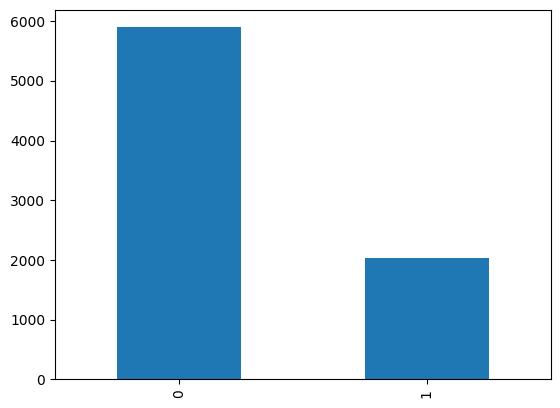

In [7]:
# plotting the label count :-
df['label'].value_counts().plot(kind='bar')

### Data Cleaning

In [8]:
# Regular expressions are a powerful language for matching text patterns.
import re

In [9]:
df['tweet'][3]

"I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/"

In [10]:
# substitute " 'm " with "am"
# '\b' returns a match where the specified pattern is at the beginning or at the end of a word
re.sub(r"'m\b", " am", df['tweet'][3])

'I am wired I know I am George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/'

In [11]:
df['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [12]:
# r means the string will be treated as raw string
# Causes the resulting RE to match 1 or more repetitions of the preceding RE
# Removing only @
re.sub(r"@+","",df['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to. Apple really dropped the ball with that design. #drinkyourhaterade'

In [13]:
# Removing whole username along with @
re.sub(r"@[A-Za-z0-9]+","",df['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [14]:
df['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
# Removing the # tag 
re.sub(r"#","",df['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [16]:
df['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
# \S Matches any character which is not a whitespace character
# Removing the hyper links
re.sub(r"http\S+","",df['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [18]:
df['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [19]:
# removing or get rid of special characters
# ^ (Caret) means remove any characters except any specifix written characters 
# ( ex:- ^A-Za-z , except alphabets replace other characters )
re.sub(r"[^A-Za-z]"," ",df['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [20]:
# It is a suite of libraries and programs for symbolic and 
# statistical natural language processing for English
# written in the Python programming language. 
import nltk
# They are used in corpus linguistics to test hypotheses, check for occurrences, 
# and validate linguistic rules within a language territory.
from nltk.corpus import stopwords

In [21]:
nltk_stopwords= set(stopwords.words("english"))
nltk_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
len(nltk_stopwords)

179

In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# sklearn english stopwords 
sklearn_stopwords=set(ENGLISH_STOP_WORDS)
sklearn_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [24]:
len(sklearn_stopwords)

318

In [25]:
# finding the comman stopwords from nltk and sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'are', 'some', 'whom', 'of', 'with', 'once', 're', 'a', 'in', 'that', 'ourselves', 'she', 'how', 'from', 'off', 'them', 'her', 'yourself', 'such', 'an', 'you', 'against', 'it', 'so', 'if', 'there', 'few', 'nor', 'own', 'only', 'yours', 'ours', 'been', 'on', 'what', 'your', 'do', 'but', 'we', 'where', 'why', 'other', 'to', 'is', 'the', 'they', 'after', 'through', 'not', 'during', 'who', 'should', 'between', 'which', 'him', 'those', 'under', 'at', 'below', 'he', 'until', 'all', 'up', 'both', 'again', 'had', 'as', 'our', 'be', 'his', 'were', 'most', 'will', 'my', 'has', 'i', 'here', 'very', 'further', 'while', 'myself', 'each', 'or', 'itself', 'now', 'and', 'over', 'any', 'its', 'about', 'because', 'no', 'same', 'their', 'above', 'by', 'can', 'am', 'into', 'these', 'for', 'have', 'was', 'yourselves', 'than', 'before', 'me', 'themselves', 'being', 'himself', 'when', 'down', 'more', 'too', 'herself', 'out', 'this', 'hers', 'then'}


In [26]:
# total number of comman stopwords between nltk and sklearn library
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [27]:
# combining the stopwords form nltk and sklearn 
# note :- not adding comman stopwords twice
combined_stopwords=nltk_stopwords.union(sklearn_stopwords)

In [28]:
len(combined_stopwords)

378

In [29]:
# Text Normalization : Stemming ( ) and Lemmatization (prefer)
# Lemmatization :- converting similiar meaning words into one word ( root token) ex- go,goes -> go,go
# and it imports entire english dictionary , so that lemmatized words are belongs to english dictionary ( having some meaning)

# Stemming :- it removes the prefix and suffix form the words.
# stemming comes with set of rules and work fast, but some times after stemming some words don't have any gramatical meaning 

# case normalization :- converting text into upper or lower case


In [30]:
# NLTK Stemmers. Interfaces used to remove morphological affixes from words, leaving only the word stem.
# Using Lemmatizer , becuase it will produces root words which contain some grammatical meaning.
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [31]:
# sample demo
lemmatizer.lemmatize("goes")

'go'

In [32]:
# spliting documents into words
df['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [33]:
# sample demo on our dataset

# used for storing root words in it
new_doc= ''
# token will represent each individal word in document 63 
for token in df['tweet'][63].split():
    new_doc=new_doc + lemmatizer.lemmatize(token.lower()) + ' '
new_doc

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [34]:
# library for expanding and creating common English contractions in text. 
# This is very useful for dimensionality reduction by normalizing 
# the text before generating word or character vectors. 
# Fixes contractions such as `you're` to you `are`.
import contractions

In [35]:
df['tweet'][3]

"I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/"

In [36]:
contractions.fix(df['tweet'][3])

'I am wired I know I am George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/'

In [37]:
df['tweet'][18]

"The reason I don't have one. #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck #blackberrypic.twitter.com/zpggd7caZN"

In [38]:
contractions.fix(df['tweet'][18])

'The reason I do not have one. #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck #blackberrypic.twitter.com/zpggd7caZN'

## Defining the cleaning function

In [39]:
def tweet_cleaner_without_stopwords(text):
    new_text=re.sub(r"'s\b", " is", text)
    new_text=re.sub("#","",new_text)
    new_text=re.sub(r"@[A-Za-z0-9]+","",new_text)
    new_text=re.sub(r"http\S+","",new_text)
    new_text=contractions.fix(new_text)
    new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
    # The strip() method removes any leading, and trailing whitespaces. 
    new_text=new_text.lower().strip()

    cleaned_text=''
    for token in new_text.split():
        cleaned_text=cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text
        

In [40]:
cleaned_tweet_without_stopwords = [ ]
for docs in df['tweet']:
    cleaned_tweet_without_stopwords.append(tweet_cleaner_without_stopwords(docs))
cleaned_tweet_without_stopwords

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ',
 'iphone software update fucked up my phone big time stupid iphones ',
 'happy for u instapic instadaily u sony xperia xperiaz ',
 'new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ',
 'bout to go shopping again listening to music iphone justme music likeforlike followforfollow ',
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ',
 'h

In [41]:
cleaned_tweet_without_stopwords[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [42]:
df['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [43]:
cleaned_tweet_without_stopwords[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [44]:
df['cleaned_tweet_without_stopwords']=cleaned_tweet_without_stopwords
df.head()

,label,tweet,cleaned_tweet_without_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


### Data Visualization

In [45]:
all_words= [] 
for token in df['tweet']:

    # append() function adds the full input to the list as a 
    # single item. extend() adds each item to the list 
    # independently after iterating through each one in the input.
    all_words.extend(token.split())

In [46]:
all_words[:50]

['#fingerprint',
 '#Pregnancy',
 'Test',
 'https://goo.gl/h1MfQV',
 '#android',
 '#apps',
 '#beautiful',
 '#cute',
 '#health',
 '#igers',
 '#iphoneonly',
 '#iphonesia',
 '#iphone',
 'Finally',
 'a',
 'transparant',
 'silicon',
 'case',
 '^^',
 'Thanks',
 'to',
 'my',
 'uncle',
 ':)',
 '#yay',
 '#Sony',
 '#Xperia',
 '#S',
 '#sonyexperias…',
 'http://instagram.com/p/YGEt5JC6JM/',
 'We',
 'love',
 'this!',
 'Would',
 'you',
 'go?',
 '#talk',
 '#makememories',
 '#unplug',
 '#relax',
 '#iphone',
 '#smartphone',
 '#wifi',
 '#connect...',
 'http://fb.me/6N3LsUpCu',
 "I'm",
 'wired',
 'I',
 'know',
 "I'm"]

In [47]:
len(set(all_words))

34348

In [48]:
import matplotlib.pyplot as plt

# frequency distribution :- 
# Return the total number of sample values (or “bins”) 
# that have counts greater than zero.
freq_dist= nltk.FreqDist(all_words)
freq_dist

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

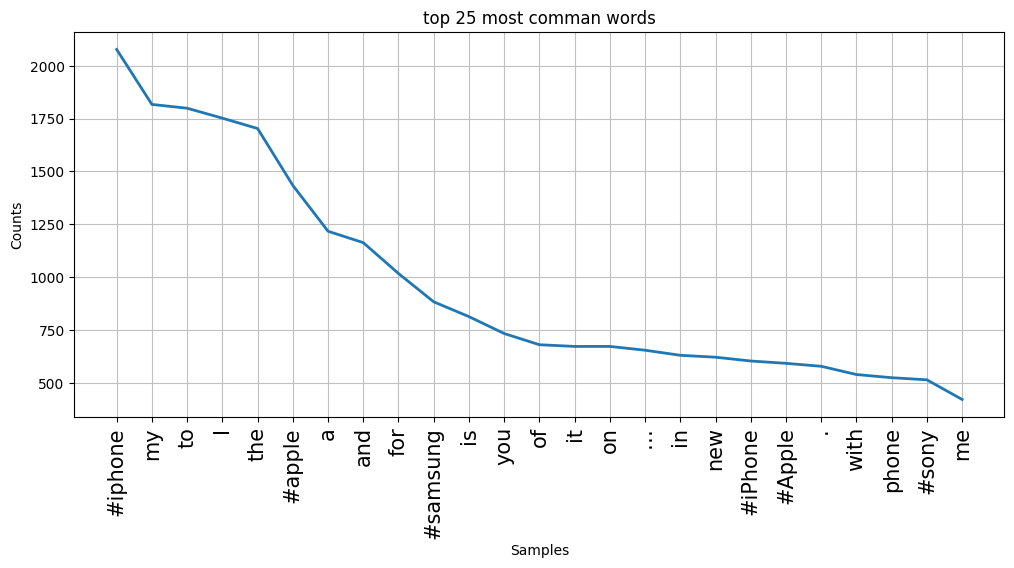

In [49]:
plt.figure(figsize=(12,5))
plt.title("top 25 most comman words")
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False)

plt.show()

#### Data visualization on 'cleaned_tweet_without_stopwords'

In [50]:
all_words= [] 
for token in df['cleaned_tweet_without_stopwords']:
    all_words.extend(token.split())

In [51]:
all_words[:50]

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'a',
 'transparant',
 'silicon',
 'case',
 'thanks',
 'to',
 'my',
 'uncle',
 'yay',
 'sony',
 'xperia',
 's',
 'sonyexperias',
 'we',
 'love',
 'this',
 'would',
 'you',
 'go',
 'talk',
 'makememories',
 'unplug',
 'relax',
 'iphone',
 'smartphone',
 'wifi',
 'connect',
 'i',
 'am',
 'wired',
 'i',
 'know',
 'i',
 'am',
 'george',
 'i',
 'wa']

In [52]:
freq_dist= nltk.FreqDist(all_words)
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'i': 2555, 'my': 2286, 'the': 2025, 'to': 1954, 'a': 1610, 'is': 1498, 'samsung': 1416, 'it': 1290, ...})

In [53]:
# NOTE :-Size of vocab will determined the size of 'features'

In [54]:
len(set(all_words))

15981

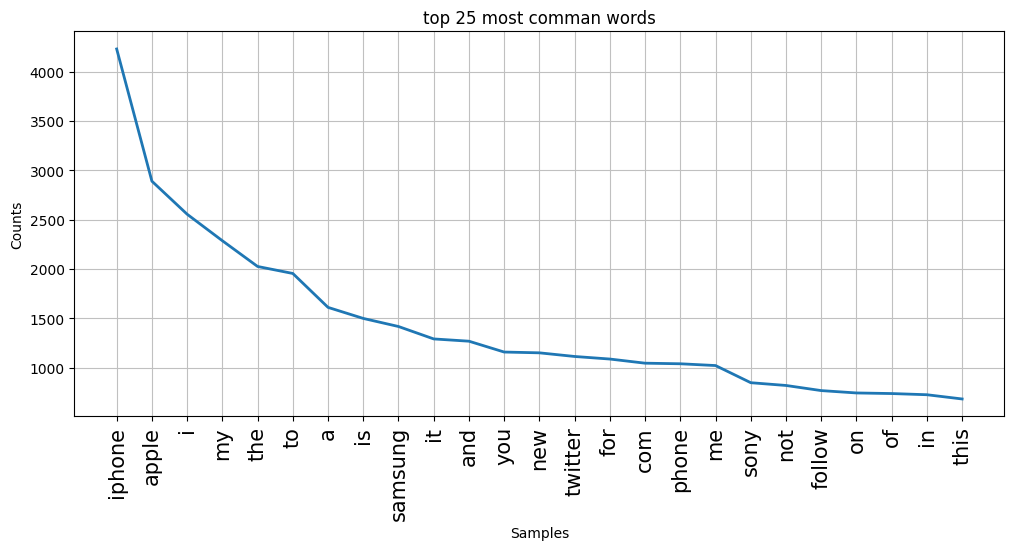

In [55]:
plt.figure(figsize=(12,5))
plt.title("top 25 most comman words")
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False)

plt.show()

### Removing stopwords from the tweets :-


In [56]:
def tweet_cleaner_with_stopwords(text):
    new_text=re.sub(r"'s\b", " is", text)
    new_text=re.sub("#","",new_text)
    new_text=re.sub(r"@[A-Za-z0-9]+","",new_text)
    new_text=re.sub(r"http\S+","",new_text)
    new_text=contractions.fix(new_text)
    new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
    new_text=new_text.lower().strip()

    # 'combined_stopwords' are total stopwords present in nltk and sklearn library
    new_text= [token for token in new_text.split() if token not in combined_stopwords]
    
    cleaned_text=''
    for token in new_text:
        cleaned_text=cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text
        

### BEST WAY TO CALL THIS FUNCTIONS AS A DATA SCIENTIST
cleaned_tweet_with_stopwords=list ( df['tweet'].apply(tweet_cleaner_with_stopwords()) )

In [57]:
cleaned_tweet_with_stopwords = [ ]
for docs in df['tweet']:
    cleaned_tweet_with_stopwords.append(tweet_cleaner_with_stopwords(docs))
cleaned_tweet_with_stopwords

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ',
 'love talk makememories unplug relax iphone smartphone wifi connect ',
 'wired know george way iphone cute daventry home ',
 'amazing service apple talk question unless pay stupid support ',
 'iphone software update fucked phone big time stupid iphones ',
 'happy instapic instadaily sony xperia xperiaz ',
 'new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ',
 'bout shopping listening music iphone justme music likeforlike followforfollow ',
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ',
 'hey apple make new ipod make new color inch thinner make crash fuckin minite ',
 'ha heavy machinery need really dropped ball design drinkyourhat

In [58]:
df['cleaned_tweet_with_stopwords']=cleaned_tweet_with_stopwords

In [59]:
df.head()

,label,tweet,cleaned_tweet_without_stopwords,cleaned_tweet_with_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [60]:
all_words= [] 
for token in df['cleaned_tweet_with_stopwords']:
    all_words.extend(token.split())

In [61]:
freq_dist= nltk.FreqDist(all_words)
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'samsung': 1416, 'new': 1149, 'twitter': 1112, 'com': 1044, 'phone': 1038, 'sony': 846, 'follow': 766, 'pic': 629, ...})

In [62]:
len(set(all_words))

15738

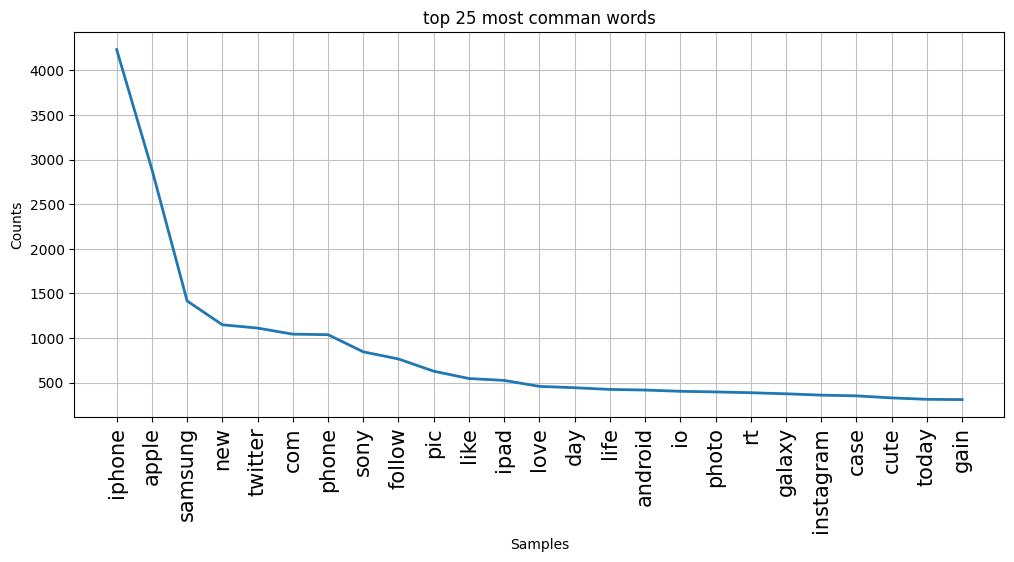

In [63]:
plt.figure(figsize=(12,5))
plt.title("top 25 most comman words")
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False)

plt.show()

In [64]:
all_words

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'transparant',
 'silicon',
 'case',
 'thanks',
 'uncle',
 'yay',
 'sony',
 'xperia',
 'sonyexperias',
 'love',
 'talk',
 'makememories',
 'unplug',
 'relax',
 'iphone',
 'smartphone',
 'wifi',
 'connect',
 'wired',
 'know',
 'george',
 'way',
 'iphone',
 'cute',
 'daventry',
 'home',
 'amazing',
 'service',
 'apple',
 'talk',
 'question',
 'unless',
 'pay',
 'stupid',
 'support',
 'iphone',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'stupid',
 'iphones',
 'happy',
 'instapic',
 'instadaily',
 'sony',
 'xperia',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cable',
 'uk',
 'bay',
 'amazon',
 'etsy',
 'new',
 'year',
 'rob',
 'cross',
 'toby',
 'young',
 'evemun',
 'mcmafia',
 'taylor',
 'spectre',
 'newyear',
 'starting',
 'recipe',
 'technology',
 'samsunggalaxys',
 'iphonex',
 'pic',
 'twitter',
 'com',
 'pj

In [65]:
# removing some other words which will not able to help in our model
dataset_specific_stopword=['phone','io' , 'rt' , 'tweeter','follow','com']
final_stopwords=dataset_specific_stopword + list(combined_stopwords)

In [66]:
len(final_stopwords)

384

In [67]:
def tweet_cleaner_with_final_stopwords(text):
    new_text=re.sub(r"'s\b", " is", text)
    new_text=re.sub("#","",new_text)
    new_text=re.sub(r"@[A-Za-z0-9]+","",new_text)
    new_text=re.sub(r"http\S+","",new_text)
    new_text=contractions.fix(new_text)
    new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
    new_text=new_text.lower().strip()

    new_text= [token for token in new_text.split() if token not in final_stopwords]
    # removing words which are of 2 or less characters
    new_text= [token for token in new_text if len(token)>2 ]
    cleaned_text=''
    for token in new_text:
        cleaned_text=cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [68]:
cleaned_tweet_with_final_stopwords = [ ]
for docs in df['tweet']:
    cleaned_tweet_with_final_stopwords.append(tweet_cleaner_with_final_stopwords(docs))
cleaned_tweet_with_final_stopwords

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ',
 'love talk makememories unplug relax iphone smartphone wifi connect ',
 'wired know george way iphone cute daventry home ',
 'amazing service apple talk question unless pay stupid support ',
 'iphone software update fucked big time stupid iphones ',
 'happy instapic instadaily sony xperia xperiaz ',
 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter pjiwq wtc ',
 'bout shopping listening music iphone justme music likeforlike followforfollow ',
 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ',
 'hey apple make new ipod make new color inch thinner make crash fuckin minite ',
 'heavy machinery need really dropped ball design drinkyourhaterade ',
 'contemp

In [69]:
df['cleaned_tweet_with_final_stopwords']=cleaned_tweet_with_final_stopwords

In [70]:
df.head()

,label,tweet,cleaned_tweet_without_stopwords,cleaned_tweet_with_stopwords,cleaned_tweet_with_final_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support,amazing service apple talk question unless pay stupid support


In [71]:
all_words= [] 
for token in df['cleaned_tweet_with_final_stopwords']:
    all_words.extend(token.split())

In [72]:
freq_dist= nltk.FreqDist(all_words)
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'samsung': 1416, 'new': 1149, 'twitter': 1112, 'sony': 846, 'pic': 629, 'like': 547, 'ipad': 526, 'love': 459, ...})

In [73]:
len(set(all_words))

15348

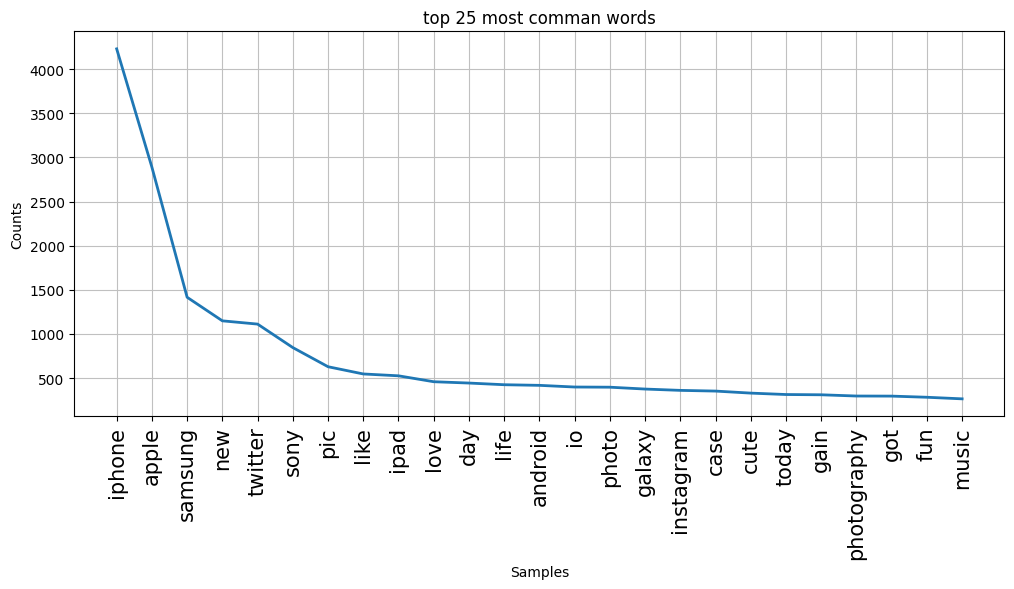

In [74]:
plt.figure(figsize=(12,5))
plt.title("top 25 most comman words")
plt.xticks(fontsize=15)

freq_dist.plot(25,cumulative=False)

plt.show()

In [75]:
len(all_words)

82529

## Bag of Words model ( Feature extraction) :- 

A bag of words is a representation of text that describes the occurrence of words within a document. <br>
We just keep track of word counts and disregard the grammatical details and the word order. <br>
It is called a “bag” (swell out -> to remove something bigger ) of words because any information about the order <br>
or structure of words in the document is discarded.<br>

the length of each document(record) vector = total no of words in vocab(unique words in corpus)

Document-Term-Matrix X = [ N X p]
where N=> no of documents
p=> no. of unique words in the vocab

##### Types of models in bag of words:-
1) One hot encoding :- if any specific word is present in any docs(records), it put value 1 otherwise 0
2) countVectorizer :- it count total number of occurence of words in docs(records)
3) TF-IDF Vectorizer :- 

### We are going to use "document vectorizer" to convert our unstructured documents into structured or equal length document.
ex :- doc1 :- i am Gautam
      doc2 :- i love cricket and football
these two documents (data points of curpos ) are unstructured, becuase 
length of doc1 is 1x3 , and doc2 is 1x5
thus,
         I am Gautam  love  cricket and football
doc1     1  1   1      0       0      0    0
doc2     1  0   0      1       1      1    1
now , length of both doc. is 1x7 equal .

In [76]:
df.shape

(7920, 5)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [78]:
cv_features = cv.fit_transform(df['cleaned_tweet_with_final_stopwords'])

In [79]:
cv_features.shape

(7920, 15345)

In [80]:
cv_features.size

78060

In [81]:
# Sparse matrix is a matrix which contain huge no. of 0 (zeros)
cv_features[0]

<1x15345 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [82]:
# csr = compressed sparse row matrix
type(cv_features)

scipy.sparse._csr.csr_matrix

In [83]:
# to decompressing the CSR data
cv_features[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
# Document-Term-Matrix X = [ N X p]
# where N=> no of documents
# p=> no. of unique words in the vocab
new_df=pd.DataFrame(cv_features.todense())

In [85]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15335,15336,15337,15338,15339,15340,15341,15342,15343,15344
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
new_df.shape

(7920, 15345)

In [87]:
new_df.size

121532400

In [88]:
# in crores 
print(new_df.size/1e7, " crores")

12.15324  crores


In [89]:
# counting non_zeros in that dataset
np.count_nonzero(new_df)

78060

In [90]:
# non zeros in percentage :- 
print("1s occurence % in dataset :- ",100*np.count_nonzero(new_df)/new_df.size)

1s occurence % in dataset :-  0.06422978563741027


In [91]:
cv.get_feature_names_out()[:50] # vocab words 

array(['aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl', 'aarhus',
       'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal', 'aaydojbfkq',
       'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb', 'abc', 'abdou',
       'abe', 'aber', 'abercrombie', 'abi', 'ability', 'abit', 'able',
       'ableton', 'abnqum', 'aboard', 'aboutalook', 'aboutdamntime',
       'abouttime', 'abouttonight', 'abp', 'abscbn', 'absence',
       'absolute', 'absolutely', 'absurd', 'abu', 'abudhabi', 'abuja',
       'abujacity', 'abujafct', 'abujapeople', 'abujaphones',
       'abukamalyasinpic', 'abuse', 'abxq'], dtype=object)

In [92]:
# total number of vocab in our dataset
len(cv.get_feature_names_out())

15345

In [93]:
cv_features[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
# actual words present in the 0th index document(record ) 
# asarray() function is used when we want to convert input to an array. 
# Input can be lists, lists of tuples, tuples, tuples of tuples, tuples of lists and arrays.
cv.inverse_transform(np.asarray(cv_features[0].todense()))

[array(['android', 'apps', 'beautiful', 'cute', 'fingerprint', 'health',
        'igers', 'iphone', 'iphoneonly', 'iphonesia', 'pregnancy', 'test'],
       dtype='<U41')]

In [95]:
df['cleaned_tweet_with_final_stopwords'][0]

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone '

## Train Test Split :-

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# 1st parameter is independent features 
# 2nd parameter is the target column of the dataset
# 0.25 means 75% dataset is for training and 25% is for testing
# 'stratify' will distribute data in equal ration in both test and training . ( usesful when dataset is unbalanced)
x_train,x_test,y_train,y_test = train_test_split(cv_features,df['label'],test_size=0.25,stratify=df['label'],random_state=42)

In [98]:
# (rows x columns (features) )
print("x_train :- ",x_train.shape)
print("x_test :- ",x_test.shape)
print("y_train :- ",y_train.shape)
print("y_test :- ",y_test.shape)

x_train :-  (5940, 15345)
x_test :-  (1980, 15345)
y_train :-  (5940,)
y_test :-  (1980,)


In [99]:
# to show the extual data if it contain huge no of zeros in it.
x_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
y_train

5154    0
6978    0
4200    0
2333    1
4581    1
       ..
3182    1
4726    0
5281    0
2845    0
7919    0
Name: label, Length: 5940, dtype: int64

## Model Building ( Training and Testing ):-
Will use different different models for training and testing , <br>
and select the model which contain high accuracy ( without overfitting and underfitting)

#### 1) Logistic regression :- 

In [101]:
from sklearn.linear_model import LogisticRegression
# creating instance of LogisticRegression class
lr_model=LogisticRegression()

In [102]:
# training of the model on training dataset
lr_model.fit(x_train,y_train)

LogisticRegression()

In [103]:
# accuracy of the model on training data
print(lr_model.score(x_train,y_train))
# accuracy of the model on test data
print(lr_model.score(x_test,y_test))

0.9722222222222222
0.8787878787878788


In [104]:
# prediction of model on test data
y_pred=lr_model.predict(x_test)

In [105]:
# first 10 pred values
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [106]:
# actual first 10 values
y_test[:10]

5167    0
3855    1
835     0
4221    0
172     1
4708    0
2247    0
3634    0
3794    1
1283    0
Name: label, dtype: int64

NOTE :- We can't use this model for deployment,
because this logistic model is "overfitted" model.<br>
our test and training accuracy having huge percentage difference.<br>
Normally, if training and testing accuracy having 1-2 % variation, then its ok.

#### 2) Logistic Regression ( L1 Regularization :- Lasso Regression )
l1 regularization will helpfull for features selection in our model.

l2 regularization ( ridge ) will helpfull for handling multi-collinearity in features

In [107]:
# 'class_weight' :- it will tell the model how much imp. need to give to each class
# ex :- in spam/ham emails , if we have least spam emails, them class_weight='balanced' means
# we are telling our model to also focused on this spam class, becuase they are very less as compare to ham emails.

# Solver: Think of it as the method the algorithm uses to find the best parameters 
# (weights) for the logistic regression model.
# Liblinear Solver: This is a specific algorithm used for optimization. 
# It's well-suited for problems where you have a relatively small to medium amount of data. 
# It works by applying a technique called coordinate descent, and 
# it's efficient for linear models like logistic regression.

# 'C' :- allows us to control the trade-off between fitting the training data 
# closely and preventing overfitting by adjusting the regularization strength.
lr_lasso_model=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.5)

In [108]:
lr_lasso_model.fit(x_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [109]:
print(lr_lasso_model.score(x_train,y_train))
print(lr_lasso_model.score(x_test,y_test))

0.8924242424242425
0.8681818181818182


NOTE :- This model having less accuracy on test data as compare to lg_model<br>
But this model is not overfitted model ( because diff. between test and training accuracy<br>
is low.

#### 3) Support Vector Machine :-

In [110]:
from sklearn.svm import SVC

In [111]:
# 'C' :- allows us to control the trade-off between fitting the training data 
# closely and preventing overfitting by adjusting the regularization strength.
svm_model=SVC(class_weight='balanced',C=0.3)

In [112]:
svm_model.fit(x_train,y_train)

SVC(C=0.3, class_weight='balanced')

In [113]:
print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test,y_test))

0.897979797979798
0.8545454545454545


NOTE :- svm_model is less overfitted as compare to lr_model,
but it is slightly overfitted.

#### 4) Random Forest :-

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
# instance of RandomForestClassifier
rf_model=RandomForestClassifier()

In [116]:
print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test,y_test))

0.897979797979798
0.8545454545454545


NOTE :- svm_model is less overfitted as compare to lr_model, but it is slightly overfitted.

#### 5) Gradient Boosting :-

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
# instance of GradientBoostingClassifier
gr_model=GradientBoostingClassifier()

In [119]:
gr_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [120]:
print(gr_model.score(x_train,y_train))
print(gr_model.score(x_test,y_test))

0.8521885521885522
0.8313131313131313


## Cross Validation of our models :-
It is useful for checking the consistency of the models performance<br>
Also used to prevent the overfitting in the model

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
# independent features (input features )
X=cv_features
# traget feature ( output feature )
y=df['label']

In [123]:
# cross validation on random forest model 
# parameters :- 
# 1st parameter is estimator , this object implementing ‘fit’
# The object to use to fit the data.
# 'scoring' Determines the cross-validation splitting strategy. default =5 
np.mean(cross_val_score(rf_model,X,y,cv=5,scoring='accuracy'))

0.8643939393939395

In [124]:
# cross validation on support vector model 
np.mean(cross_val_score(svm_model,X,y,cv=5,scoring='accuracy'))

0.856439393939394

In [125]:
# cross validation on l1 regularization model 
np.mean(cross_val_score(lr_lasso_model,X,y,cv=5,scoring='accuracy'))

0.8666666666666666

In [126]:
# cross validation on gradient boosting model 
np.mean(cross_val_score(gr_model,X,y,cv=5,scoring='accuracy'))

0.8305555555555555

NOTE :- ' lr_lasso_model ' contains highest accuracy after cross validation

## Hyperparamter Tuning on 'lr1 ( lasso) model':- 
Hyperparameter tuning allows data scientists to tweak (to change something slighly)<br> model performance for optimal results.

#### GridSearchCV
GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
# arange(start,end-1,gap_value)
# ex:- .00001 , 0.05001 , ......so on 
c_values=np.arange(0.00001,1,0.05) # 20 values

In [129]:
# creating instance of l1 regularization class 
lr1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.5)

In [130]:
# performing gridsearch method for hyperparamter tuning
# 'return_train_score' :- If False, the cv_results_ attribute will not include training scores.
# n_jobs :- Number of jobs to run in parallel. None means 1 unless in a 
# joblib.parallel_backend context. -1 means using all processors.

# verbose:- Controls the verbosity: the higher, the more messages.
grid=GridSearchCV(estimator=lr1,param_grid={'C':c_values},scoring='accuracy',
                 return_train_score=True,verbose=2,n_jobs=-1)
grid_result=grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [131]:
grid_result

GridSearchCV(estimator=LogisticRegression(C=0.5, class_weight='balanced',
                                          penalty='l1', solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [132]:
# best work at value of 'C' is 
grid_result.best_params_

{'C': 0.90001}

In [133]:
# highest accuracy 
grid_result.best_score_

0.8714646464646464

In [134]:
grid_result.best_index_

18

In [135]:
# training best accuracy after hyperparamter tuning on l1 regularization
grid_result.cv_results_['mean_train_score'][grid_result.best_index_]*100

91.6161616161616

In [136]:
# test accuracy
grid_result.cv_results_['mean_test_score'][grid_result.best_index_]*100

87.14646464646464

In [137]:
# std deviation score
grid_result.cv_results_['std_test_score'][grid_result.best_index_]*100

0.39243106737171907

NOTE :- After hyperparameter tuning , our models' accuracy increases,<br>
but this model is overfitted model, thus con't be used .

### Lets train the model on 1000 most occurence words in documents :-
It will reduce the size of features from 15k to 1k 

In [138]:
# one hot encoding 
# min_df :- each word contains at least 10 occurance in corpus
# max_features :- only 1000 features will be used
cv1 = CountVectorizer(min_df=10,max_features=1000)
cv_features = cv1.fit_transform(df['cleaned_tweet_with_final_stopwords'])

In [139]:
# (rows x columns )
cv_features.shape

(7920, 1000)

In [140]:
cv_features.size

53100

In [141]:
# tran test split :-

x_train,x_test,y_train,y_test = train_test_split(cv_features,df['label'],test_size=0.25,stratify=df['label'],random_state=42)

In [142]:
# creating instance of l1 algo class
lr_lasso_model_with_top_1000=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.5)

In [143]:
# training thes model on training data
lr_lasso_model_with_top_1000.fit(x_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [144]:
print(lr_lasso_model_with_top_1000.score(x_train,y_train))
print(lr_lasso_model_with_top_1000.score(x_test,y_test))

0.8843434343434343
0.8601010101010101


<b># Fantastic # </b> :- After selecting only top 1000 features, our models <br>
accuracy is maintained and this model is also balanced ( not overfitted nor underfitted )

### <b>Model depolyment testing :- 

In this process , we are going to save the model using pickle and then use that model file for further deployment process

In [146]:
import pickle

In [147]:
'''
dump() is use for save the model 

'wb' means write binary

'.sav'  = The SAV file extension is more commonly known as a generic 
          extension that is used to save files and data, typically 
          for saving progress in video games.
'''
pickle.dump(lr_lasso_model_with_top_1000,open('model.sav','wb'))

In [148]:
#### Saving the CountVectorizer object 'cv1'

pickle.dump(cv1,open('cv.sav','wb'))

#### Checking whether our model and CountVectorizer file works fine or not ?

In [150]:
'''
load() is used for load the model file into our program

'rb' ->  write binary
'''

l1_model_new=pickle.load(open('model.sav','rb'))

In [151]:
# loading the CountVectorizer file for encoding input text
new_cv=pickle.load(open('cv.sav','rb'))

In [204]:
# input tweet
input_tweet="today got my iphone and i am happy with its delivery"
input_tweet

'today got my iphone and i am happy with its delivery'

In [205]:
def tweetCleaner(text):
    new_text=re.sub(r"'s\b", " is", text)
    new_text=re.sub("#","",new_text)
    new_text=re.sub(r"@[A-Za-z0-9]+","",new_text)
    new_text=re.sub(r"http\S+","",new_text)
    new_text=contractions.fix(new_text)
    new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
    new_text=new_text.lower().strip()

    new_text= [token for token in new_text.split() if token not in final_stopwords]
    # removing words which are of 2 or less characters
    new_text= [token for token in new_text if len(token)>2 ]
    cleaned_text=''
    for token in new_text:
        cleaned_text=cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [206]:
cleanedTweet= [ ]
cleanedTweet=tweetCleaner(input_tweet)

In [207]:
cleanedTweet

'today got iphone happy delivery '

In [208]:
type(cleanedTweet)

str

In [209]:
cv_encoded_tweet = new_cv.transform([cleanedTweet])

In [210]:
cv_encoded_tweet.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [211]:
cv_encoded_tweet.shape

(1, 1000)

In [212]:
cv_encoded_tweet.size

5

In [213]:
pred=l1_model_new.predict(cv_encoded_tweet)
pred

array([0], dtype=int64)

<b>Correct prediction .... :)

In [215]:
print(pred)

[0]
